# Bogleheads 3 fund portfolios

- https://www.bogleheads.org/wiki/Three-fund_portfolio

In [72]:
import bt

%matplotlib inline

START_DATE = '2015-01-01'

<AxesSubplot:title={'center':'Equity Progression'}>

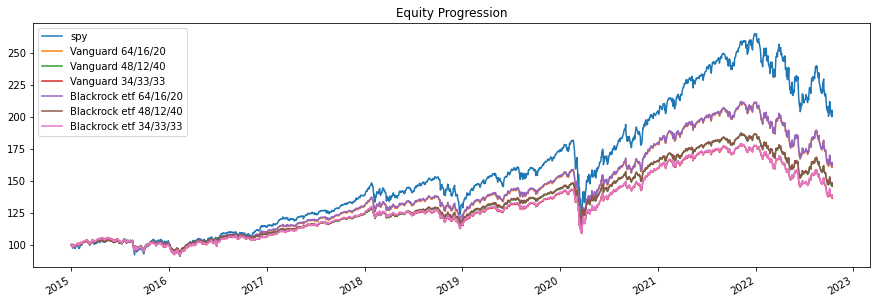

In [73]:
def make_baseline_test():
    s = bt.Strategy(
        'spy',
        [
            bt.algos.RunOnce(),
            bt.algos.SelectAll(),
            bt.algos.WeighEqually(),
            bt.algos.Rebalance(),
        ]
    )
    data = bt.get('spy', start=START_DATE)
    t = bt.Backtest(s, data)
    return t

def make_passive_portfolio_test(name, weights, rebalance_period):
    s = bt.Strategy(
        name,
        [
            {"M": bt.algos.RunMonthly(), "Q": bt.algos.RunQuarterly(), "A": bt.algos.RunYearly()}[rebalance_period],
            bt.algos.SelectAll(),
            bt.algos.WeighSpecified(**weights),
            bt.algos.Rebalance(),
        ]
    )
    data = bt.get(','.join(weights.keys()), start=START_DATE)
    t = bt.Backtest(s, data)
    return t

res = bt.run(
    make_baseline_test(),
    make_passive_portfolio_test('Vanguard 64/16/20', {
        "vtsax": 0.64,
        "vtiax": 0.16,
        "vbtlx": 0.20,
    }, 'M'),
    make_passive_portfolio_test('Vanguard 48/12/40', {
        "vtsax": 0.48,
        "vtiax": 0.12,
        "vbtlx": 0.40,
    }, 'M'),
    make_passive_portfolio_test('Vanguard 34/33/33', {
        "vtsax": 0.34,
        "vtiax": 0.33,
        "vbtlx": 0.33,
    }, 'M'),
    # make_passive_portfolio_test('Vanguard 32/08/60', {
    #     "vtsax": 0.32,
    #     "vtiax": 0.08,
    #     "vbtlx": 0.60,
    # }, 'M'),
    # make_passive_portfolio_test('Vanguard 16/04/80', {
    #     "vtsax": 0.16,
    #     "vtiax": 0.04,
    #     "vbtlx": 0.80,
    # }, 'M'),
    make_passive_portfolio_test('Blackrock etf 64/16/20', {
        "itot": 0.64,
        "ixus": 0.16,
        "agg": 0.20,
    }, 'M'),
    make_passive_portfolio_test('Blackrock etf 48/12/40', {
        "itot": 0.48,
        "ixus": 0.12,
        "agg": 0.40,
    }, 'M'),
    make_passive_portfolio_test('Blackrock etf 34/33/33', {
        "itot": 0.34,
        "ixus": 0.33,
        "agg": 0.33,
    }, 'M'),
)
res.plot()

In [74]:
res.display()

Stat                 spy         Vanguard 64/16/20    Vanguard 48/12/40    Vanguard 34/33/33    Blackrock etf 64/16/20    Blackrock etf 48/12/40    Blackrock etf 34/33/33
-------------------  ----------  -------------------  -------------------  -------------------  ------------------------  ------------------------  ------------------------
Start                2015-01-01  2015-01-01           2015-01-01           2015-01-01           2015-01-01                2015-01-01                2015-01-01
End                  2022-10-14  2022-10-14           2022-10-14           2022-10-14           2022-10-14                2022-10-14                2022-10-14
Risk-free rate       0.00%       0.00%                0.00%                0.00%                0.00%                     0.00%                     0.00%

Total Return         100.60%     60.46%               45.50%               36.38%               61.32%                    46.17%                    37.07%
Daily Sharpe         0.58   